
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1 - Ejercicio 1
**GRUPO 13**

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn

seaborn.set_context('talk')

!pip install ptitprince
import ptitprince as pt

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
df.shape

(6095, 48)

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

1. Seleccionamos las columnas relevantes

In [ ]:
# 1) Columnas relevantes
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'work_contract_type', 
                     'salary_in_usd', "work_role"]

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_contract_type,salary_in_usd,work_role,cured_programming_languages
0,ninguno,Ninguno,43000.0,Full-Time,NaN,Consultant,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,Full-Time,NaN,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Full-Time,NaN,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Full-Time,NaN,Developer,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,Full-Time,NaN,Infosec,[ninguno]


In [ ]:
df_lang.work_role.value_counts()[::10]

Developer                                 8809
HelpDesk                                   238
Middleware                                  52
todos los de arriba                         10
Soporte de aplicaciones niv 1, 2 y 3         7
Soporte tecnico, redes y programación        6
Informatica forense                          6
Analista Funcional                           5
Cto                                          5
Service manager                              4
Coordinadora proyectos educativos tech       4
Application Support                          4
IT Responsible                               3
Project leader                               3
R&D Engineer                                 2
Repartidor, Construcción y atendedor         2
Game developer                               2
Responsable BI                               2
Analista                                     1
system engineer                              1
QA Automation                                1
Business Part

##2. Consideraciones
---

A continuación, de acuerdo a las columnas relevantes que elegimos mas arriba, decidimos filtrar nuestro dataset considerando:

*   **Personas cuyo sueldo no esté dolarizado**
*   **Modalidad de contrato Full time**: no nos pareció prudente comparar salarios de modalidades de contrato con diversa carga horaria. Suponemos que la modalidad full time implica una jornada diaria de 8-9 horas. Por otra parte, aquellos que tienen contrato de forma remota (empresas del exterior), tienen una enorme diferencia salarial con el resto de la muestra, por lo que decidimos eliminarlos para nuestro análisis, lo que guarda relación con la eliminación de los sueldos dolarizados, además de que eran pocas realizaciones en comparación a la modalidad full-time.
*   **Personas que trabajen exclusivamente como desarrolladores**: se eliminaron los cargos gerenciales, managers, CEO, coordinadores, etc, ya que son personas que no utilizan el lenguaje de programación para su trabajo habitual y, por lo tanto, no responde a nuestra pregunta inicial. 

Entonces nuestro dataset tiene en cuenta aquellas personas cuyo sueldo no está dolarizado, trabajan en modalidad full-time, y como desarrolladores.





In [ ]:
# Pregunta: Dentro de los desarrolladores, que trabajan full time y cuyo sueldo no está dolarizado, ¿cuáles son los lenguajes de programación asociados a mayores salarios en pesos?
p1=df_lang["salary_in_usd"]!="Mi sueldo está dolarizado"
p2=df_lang['work_contract_type']=="Full-Time"
df_lang['work_role']=np.where((df_lang.work_role=='Frontend dev Jr ') |
                                   (df_lang.work_role=='back end') |
                                    (df_lang.work_role=='trabajo como desarrollador back, pero también tengo que estar haciendo de analista , DBA, dev frontend y a veces de helpdesk') 
                                    ,'Developer' ,df_lang.work_role)

p3= df_lang["work_role"].isin((['Developer','Software engineer','Analista/desarrollador','Technical Lead Devops']))
df_fil=df_lang[p1 & p2 & p3]
df_fil


,programming_language,tools_programming_languages,salary_monthly_NETO,work_contract_type,salary_in_usd,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,Full-Time,NaN,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Full-Time,NaN,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Full-Time,NaN,Developer,"[html, javascript, python]"
4,css,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Full-Time,NaN,Developer,"[css, html, javascript, sql, typescript]"
4,html,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Full-Time,NaN,Developer,"[css, html, javascript, sql, typescript]"
...,...,...,...,...,...,...,...
6090,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Full-Time,NaN,Developer,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Full-Time,NaN,Developer,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Full-Time,NaN,Developer,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,sql,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Full-Time,NaN,Developer,"[.net, c#, cobol, css, html, javascript, php, ..."


In [ ]:
df_fil.shape

(6620, 7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


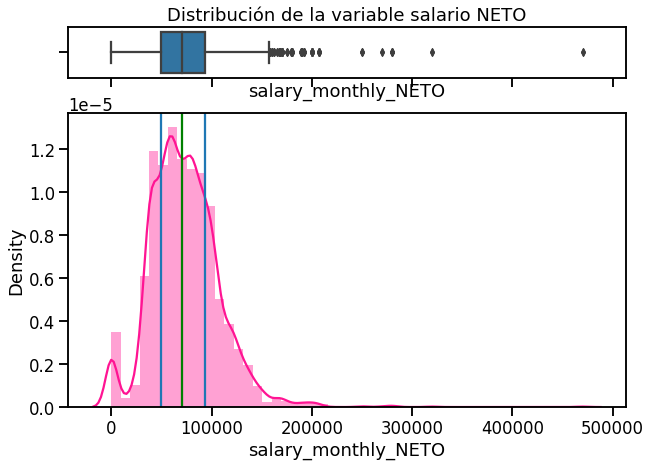

In [ ]:
#Se divide el gráfico en dos partes

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(df_fil.salary_monthly_NETO, ax=ax_box)
sns.distplot(df_fil.salary_monthly_NETO, ax=ax_hist, kde=False, hist=False)
sns.distplot(df_fil.salary_monthly_NETO, ax=ax_hist, kde=True, hist=True,norm_hist=False,color="deeppink")

plt.axvline(df_fil.salary_monthly_NETO.quantile(0.25))
plt.axvline(df_fil.salary_monthly_NETO.quantile(0.50),color='g')
plt.axvline(df_fil.salary_monthly_NETO.quantile(0.75))
 
ax_box.set_title("Distribución de la variable salario NETO")
plt.show()


In [ ]:
df_fil.salary_monthly_NETO.describe().reset_index()

,index,salary_monthly_NETO
0,count,6446.000000
1,mean,73597.815254
2,std,34662.111904
3,min,13.000000
4,25%,50000.000000
5,50%,70966.000000
6,75%,93000.000000
7,max,470000.000000


El gráfico de distribución de arriba nos muestra que el 50% de salarios para el grupo seleccionado se halla entre los 50.000 y 93.000 pesos, existiendo un sesgo hacia la izquierda en la distribución de los datos. Esto significa que la mayoría de los datos se concentran a la izquierda de la distribución, mientras que la minoría de ellos se encuentran hacia la derecha (asimetría derecha). Esta asimetría podría deberse a la existencia de valores extremos (outliers) en los datos como se puede visualizar en el boxplot de arriba. Es importante mencionar que el gráfico nos muestra como sería la distribución teórica, teniendo en cuenta que el área debajo de la curva debe ser igual a 1.

Ahora, calculamos los percentiles para determinar si estableceremos límites a nuestra población.

In [ ]:
df_fil.salary_monthly_NETO.quantile([.10,.95,.98, .99, .995, .998, .999])

0.100     37000.0
0.950    130000.0
0.980    150000.0
0.990    170000.0
0.995    200000.0
0.998    250000.0
0.999    280000.0
Name: salary_monthly_NETO, dtype: float64

##Consideraciones
---


Hemos decidido, luego de calcular percentiles sobre los valores de salarios mensuales netos, restringir nuestra muestra a aquellas personas que cobran igual o más de 37000 pesos e igual o menos de 250000 pesos, valores que se corresponden con los percentiles del 10% y 99,8%, reduciendo así en un 10,2% los valores de la muestra.

Tomamos esta decisión teniendo en cuenta que, por un lado, nos parece razonable considerar un valor de salario mínimo de 37000 pesos, ya que teniendo en cuenta que la línea de pobreza en la argentina para una familia tipo ronda los 50000 pesos, y que el salario mínimo vital y móvil se encuentra actualmente alrededor de los 22000 pesos (con aumentos ya previstos que lo llevaran hasta aproximadamente 30000 pesos), los valores por debajo de 37000 para un trabajo full-time, deben ser probablemente errores o personas realizando pasantías o trabajos (casi) ad-honorem. Por otra parte, también nos parece razonable un techo de 250000 pesos para nuestro análisis teniendo en cuenta que por lo que conocemos, en la rama de programación en general se cobran mayores salarios que en las demás ramas laborales, es decir, no nos parece un techo excesivamente alto teniendo en cuenta que es una rama laboral en general bien paga, pero claramente es un valor más que considerable teniendo en cuenta que representa la cantidad de aproximadamente 10 salarios minimo vital y movil.

***Entonces considerando lo hasta aquí desarrollado del punto 2, reformulamos la pregunta original a: Dentro de las personas que trabajan en argentina, como desarrolladores, con modalidad de trabajo full-time, cuyo sueldo neto se encuentra entre 37000 y 250000 pesos¿Cuáles son los lenguajes de programación asociados a los mejores salarios?***

In [ ]:

#Eliminación de valores inferiores al percentil 0.10 y superiores al percentil 0.998

df_fil=df_fil[(df_fil.salary_monthly_NETO > df_fil.salary_monthly_NETO.quantile(0.10)) & (df_fil.salary_monthly_NETO < df_fil.salary_monthly_NETO.quantile(.998))]
df_fil

,programming_language,tools_programming_languages,salary_monthly_NETO,work_contract_type,salary_in_usd,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,Full-Time,NaN,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Full-Time,NaN,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Full-Time,NaN,Developer,"[html, javascript, python]"
4,css,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Full-Time,NaN,Developer,"[css, html, javascript, sql, typescript]"
4,html,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Full-Time,NaN,Developer,"[css, html, javascript, sql, typescript]"
...,...,...,...,...,...,...,...
6090,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Full-Time,NaN,Developer,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Full-Time,NaN,Developer,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Full-Time,NaN,Developer,"[.net, c#, cobol, css, html, javascript, php, ..."
6090,sql,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Full-Time,NaN,Developer,"[.net, c#, cobol, css, html, javascript, php, ..."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


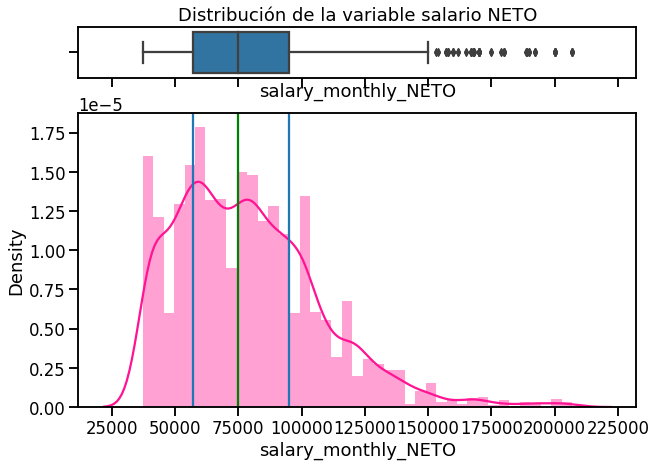

In [ ]:
#Se divide el gráfico en dos partes

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(df_fil.salary_monthly_NETO, ax=ax_box)
sns.distplot(df_fil.salary_monthly_NETO, ax=ax_hist, kde=False, hist=False)
sns.distplot(df_fil.salary_monthly_NETO, ax=ax_hist, kde=True, hist=True,norm_hist=False,color="deeppink")

plt.axvline(df_fil.salary_monthly_NETO.quantile(0.25))
plt.axvline(df_fil.salary_monthly_NETO.quantile(0.50),color='g')
plt.axvline(df_fil.salary_monthly_NETO.quantile(0.75))
 
ax_box.set_title("Distribución de la variable salario NETO")
plt.show()

In [ ]:
df_fil.salary_monthly_NETO.describe().reset_index()

,index,salary_monthly_NETO
0,count,5786.000000
1,mean,78893.740461
2,std,28894.880194
3,min,37200.000000
4,25%,57000.000000
5,50%,75000.000000
6,75%,95000.000000
7,max,207000.000000


El gráfico de arriba nos muestra la distribución de la variable salario neto luego de eliminar los valores inferiores al percentil 0.10 y superiores al percentil 0.998

In [ ]:
##Lenguajes más frecuentes

En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_fil.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
interesting_languages=language_count[:10].language.tolist()

In [ ]:
language_count[:10]

,language,frequency
0,javascript,1005
1,html,708
2,sql,681
3,java,570
4,css,531
5,typescript,359
6,.net,306
7,c#,299
8,php,260
9,python,244


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Filter out languages that we want to exclude
# Se eligieron los 10 lenguajes mas frecuentes

filtered_df_fil = df_fil[df_fil.programming_language.isin(interesting_languages)]
filtered_df_fil[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_contract_type,salary_in_usd,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,Full-Time,NaN,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Full-Time,NaN,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Full-Time,NaN,Developer,"[html, javascript, python]"
4,css,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Full-Time,NaN,Developer,"[css, html, javascript, sql, typescript]"
4,html,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Full-Time,NaN,Developer,"[css, html, javascript, sql, typescript]"


Comparamos las distribuciones para cada lenguaje de programación

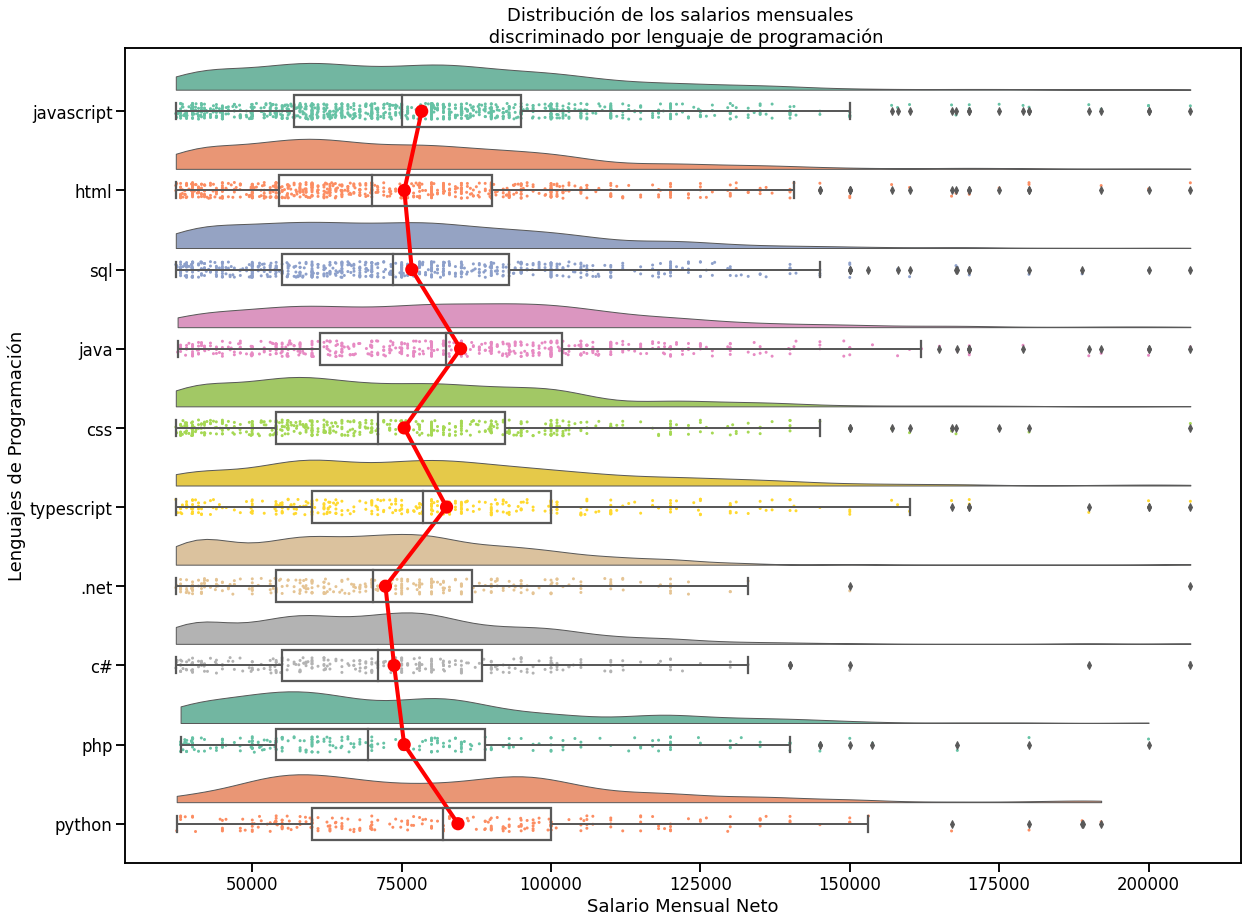

In [ ]:

plt.figure(figsize=(20,15))

ax = pt.RainCloud(y ='salary_monthly_NETO', x ='programming_language',data = filtered_df_fil, orient='h',width_viol = .8, width_box = 0.4, move = 0.0,pointplot = True
                  ,order=filtered_df_fil.programming_language.value_counts()[:10].index)
plt.xlabel("Salario Mensual Neto")
plt.ylabel("Lenguajes de Programación")

plt.title("Distribución de los salarios mensuales \n discriminado por lenguaje de programación")

plt.show()

A partir de este gráfico podemos observar que, en todos los casos, la media del salario neto (puntos rojos) se encuentra a la derecha de la mediana, lo cual nos indica una asimetría derecha en la distribución de los datos. Es por esto que, para nuestras conclusiones, nos basamos en los datos de la mediana.

In [ ]:
filtered_df_fil[['programming_language', 'salary_monthly_NETO']].groupby('programming_language').describe()

salary_monthly_NETO                ...                      
                                   count          mean  ...         75%       max
programming_language                                    ...                      
.net                               306.0  72290.440294  ...   86719.750  207000.0
c#                                 299.0  73736.317692  ...   88378.595  207000.0
css                                531.0  75420.628060  ...   92325.000  207000.0
html                               708.0  75445.458588  ...   90102.500  207000.0
java                               570.0  84869.637368  ...  101860.000  207000.0
javascript                        1005.0  78352.629443  ...   95000.000  207000.0
php                                260.0  75421.197385  ...   89000.000  200000.0
python                             244.0  84429.056025  ...  100000.000  192072.0
sql                                681.0  76700.087709  ...   92950.000  207000.0
typescript                         359.0  82515.604680  ...  100000.000  207000.0

[10 rows x 8 columns]

In [ ]:
grouped=filtered_df_fil[['programming_language', 'salary_monthly_NETO']].groupby('programming_language').describe()
grouped.columns = grouped.columns.droplevel(level=0)
grouped.sort_values(by='count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
programming_language,,,,,,,,
javascript,1005.0,78352.629443,28601.680623,37200.0,57000.00,75000.0,95000.000,207000.0
html,708.0,75445.458588,28195.086201,37200.0,54402.00,70000.0,90102.500,207000.0
sql,681.0,76700.087709,28134.478300,37200.0,55000.00,73526.0,92950.000,207000.0
java,570.0,84869.637368,30219.167907,37500.0,61253.75,82468.0,101860.000,207000.0
css,531.0,75420.628060,27708.179013,37200.0,54000.00,71000.0,92325.000,207000.0
typescript,359.0,82515.604680,31170.826654,37200.0,60000.00,78500.0,100000.000,207000.0
.net,306.0,72290.440294,24028.815433,37200.0,54000.00,70250.0,86719.750,207000.0
c#,299.0,73736.317692,25415.863305,37200.0,55000.00,71000.0,88378.595,207000.0
php,260.0,75421.197385,29415.070864,38000.0,53938.25,69400.0,89000.000,200000.0


## Conclusiones
A partir de las visualizaciones y respondiendo a la pregunta planteada, podríamos decir que dentro de los desarrolladores que trabajan full-time y cobran salarios en pesos de entre 37000 y 250000, aquellos que emplean java, python y typescript como lenguaje de programación son los que en general perciben mayores salarios en comparación con los que emplean otros lenguajes frecuentes como javascript, sql, c, css, .net, html y php, siendo este último el lenguaje menor pago.  